PROJECT TITLE:
Carbon Dioxide Emmisions Prediction Rate

PROBLEM STATEMENT:
Accurate prediction of CO₂ emission rates is critical for informing climate policy, optimizing energy strategies, and enhancing disaster preparedness. However, existing models often struggle with integrating real-time data, accounting for socio-economic variables, and adapting to regional disparities. This project aims to develop a robust, data-driven model to forecast CO₂ emission rates with higher precision, enabling proactive climate action and improved disaster management planning.

DESCRIPTION:
This Project uses a dataset consisting of Carbon Dioxide emitted by different vehicles in a city (like Cannada).the model will focus on predicting CO2 emissions prediction rate so that rate could be taken into account for further processing for reducing CO2 emissions.

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import joblib

In [2]:
#Load the dataset
df=pd.read_csv('C:/Users/HP/Downloads/CO2 Emissions_Canada.csv')

In [3]:
#display first few rows
print(df.head())

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64

In [5]:
print(df.describe())

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     4.001625                         12.556534   
std          1.354170     0.056988                          3.500274   
min          0.900000     4.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     4.000000                         12.100000   
75%          3.700000     4.000000                         14.600000   
max          8.400000     6.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [6]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [7]:
# Rows and Cols
df.shape

(7385, 12)

In [8]:
# Cols
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

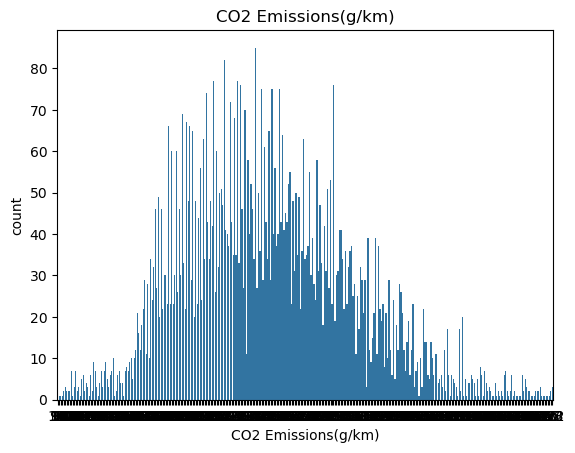

In [9]:
#Univariate Analysis
sns.countplot(x='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions(g/km)')
plt.show()

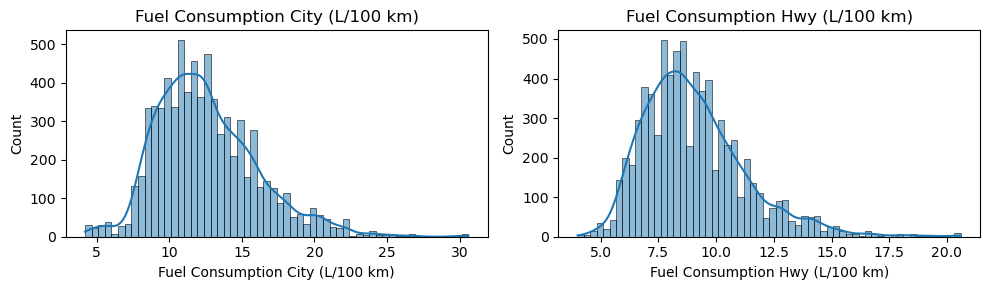

In [10]:
num_cols = ['Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)']
fig, axes = plt.subplots(1, 2, figsize=(10,3))
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

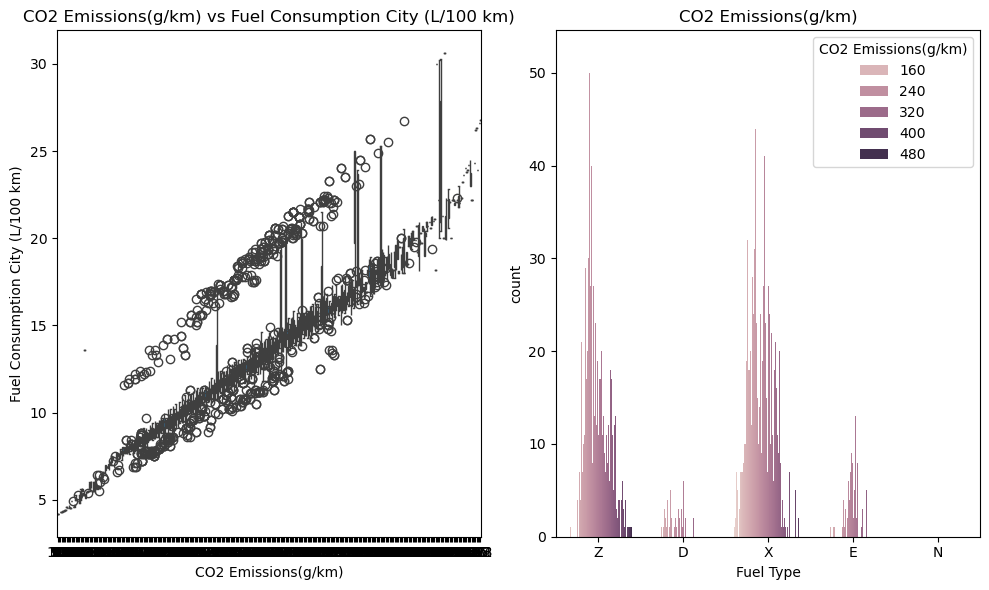

In [11]:
# Bivariate analysis
fig, axes = plt.subplots(1, 2, figsize=(10,6))
sns.boxplot(x = 'CO2 Emissions(g/km)', y = 'Fuel Consumption City (L/100 km)', data = df, ax=axes[0]).set_title('CO2 Emissions(g/km) vs Fuel Consumption City (L/100 km)')
#sns.countplot(x = 'Engine Size(L)', hue = 'CO2 Emissions(g/km)', data = df, ax=axes[1]).set_title('CO2 Emissions(g/km) vs Engine Size(L)')
sns.countplot(x = 'Fuel Type', hue = 'CO2 Emissions(g/km)', data = df, ax=axes[1]).set_title('CO2 Emissions(g/km)')
plt.tight_layout()
plt.show()

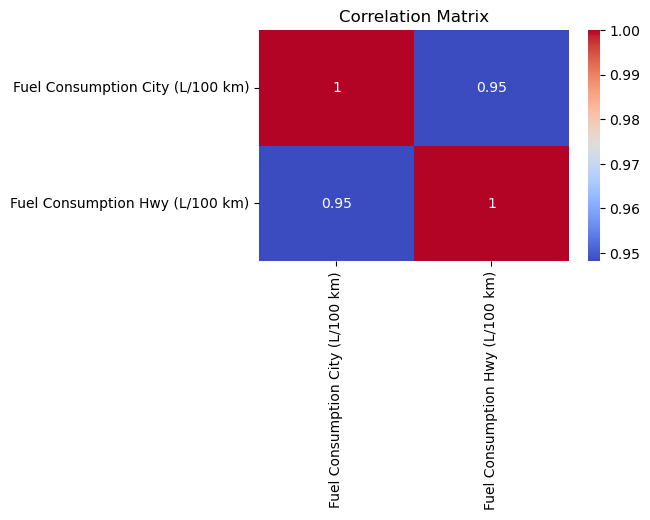

In [12]:
# Correlation matrix for numerical features
plt.figure(figsize=(5,3))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

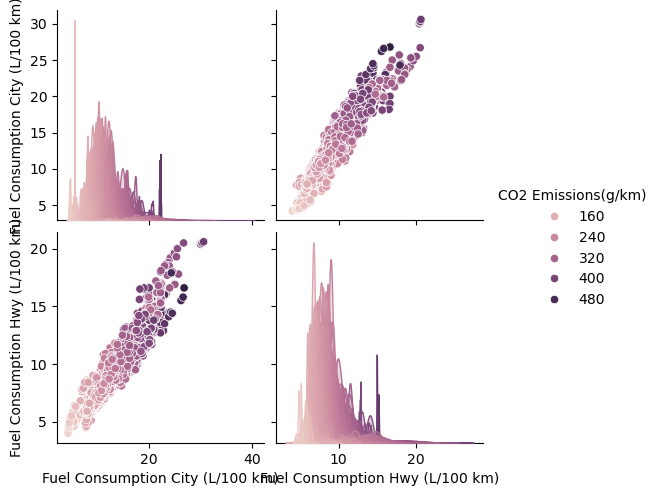

In [13]:
#Pairplot for numerical features colored by CO2 Emissions(g/km)
sns.pairplot(df, vars=num_cols, hue='CO2 Emissions(g/km)')
plt.show()

In [14]:
# Data Preprocessing
le = LabelEncoder()
categorical_cols = ['Make', 'Model', 'Vehicle Class', 
       'Transmission', 'Fuel Type']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
# Feature and target selection
X = df.drop('CO2 Emissions(g/km)', axis =1)
y = df['CO2 Emissions(g/km)']

In [16]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(5908, 11)

In [18]:
X_test.shape

(1477, 11)

In [19]:
# scale num features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [20]:
X_train

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
6590,5,1169,10,3.0,4,17,4,-0.335091,-0.429379,9.9,29
6274,31,936,5,4.0,4,2,3,0.607277,0.564406,12.7,22
2251,3,1581,0,3.0,4,25,4,0.350268,-0.022831,11.7,24
3149,32,464,13,3.4,4,9,4,-0.363647,-0.519723,9.8,29
4362,41,1870,8,2.0,4,17,4,-0.706327,-0.926271,8.7,32
...,...,...,...,...,...,...,...,...,...,...,...
5191,29,541,10,2.0,4,25,4,-0.649213,-0.745583,9.0,31
5226,31,277,2,3.5,4,22,3,-0.563544,-0.790755,9.1,31
5390,39,1036,12,3.5,4,17,3,-0.249421,-0.113175,10.4,27
860,31,1514,11,2.5,4,19,3,-0.877666,-0.745583,8.6,33


In [21]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5908, 11)
X_test shape: (1477, 11)
y_train shape: (5908,)
y_test shape: (1477,)


In [32]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression() 

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict using the model on the test data

y_train_pred = model_simple_lin_reg.predict(X_train)
y_pred = model_simple_lin_reg.predict(X_test)

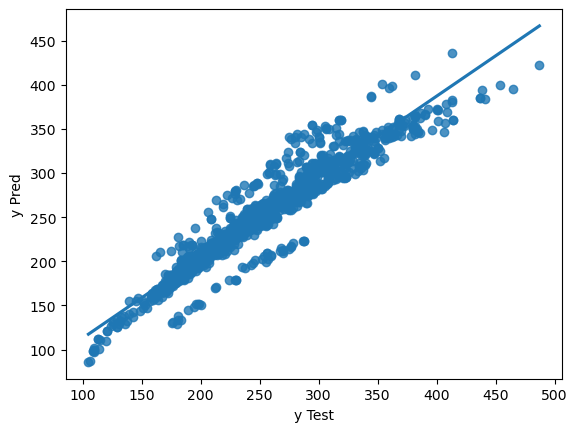

In [35]:
sns.regplot(x=y_test, y=y_pred, ci=None)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }
    
    return pd.DataFrame(scores)

In [37]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
slr_score

,linear_train,linear_test
R2,0.912694,0.909042
mae,11.182796,11.448896
mse,298.459429,312.862675
rmse,17.275978,17.687925


In [39]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    

In [42]:
#Evaluate both models
evaluate_model(rf, X_test, y_test, "Random Forest")



Random Forest Evaluation:
Accuracy: 0.5335138794854435


In [44]:
#Save the model
joblib.dump(lr, 'lr_model.pkl')

#Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [46]:
%%writefile mlapp.py

UsageError: %%writefile is a cell magic, but the cell body is empty.
